<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Problem 8.1 Page 339

a: Program to get Vout

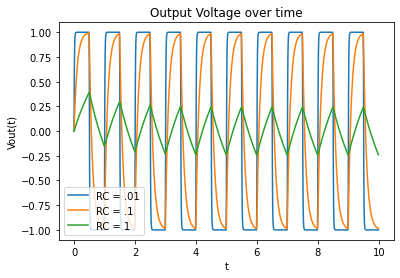

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function returns Vin given t
def Vin(t):
  val = math.floor(2*t)
  if (val % 2 == 0): return 1
  else: return -1

# Function to return dVout/dt given RC, Vour, and t
def f(RC,Vout,t):
  return (1/RC)*(Vin(t) - Vout)

# Function that fills a VoutArr given tArr, h, and RC
def FillVArr(tArr, h, RC):
  Vout = 0                # initial position

  VArr = []               # Array to fill

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill VoutArr
    VArr.append(Vout)
    k1 = h*f(RC,Vout,t)
    k2 = h*f(RC,Vout+0.5*k1,t+0.5*h)
    k3 = h*f(RC,Vout+0.5*k2,t+0.5*h)
    k4 = h*f(RC,Vout+k3,t+h)
    Vout += (k1+2*k2+2*k3+k4)/6

  return VArr

a = 0                     # t=0 start
b = 10                    # max t
N = 1000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

RC1 = .01                 # Resistance and Capacitance values
RC2 = .1
RC3 = 1

# Fill Arrays
VoutArr1 = FillVArr(tArr, h, RC1)
VoutArr2 = FillVArr(tArr, h, RC2)
VoutArr3 = FillVArr(tArr, h, RC3)

# Plot Results
plt.plot(tArr,VoutArr1,label="RC = .01")
plt.plot(tArr,VoutArr2,label="RC = .1")
plt.plot(tArr,VoutArr3,label="RC = 1")
plt.title("Output Voltage over time")
plt.xlabel("t")
plt.ylabel("Vout(t)")
plt.legend()
plt.show()


b: Explanation

This circuit is smoothing out the voltage differences between 1 and -1 with the higher the RC, the more smoothing occurs.




2) Problem 8.2 Page 346

a: Program to solve the equations

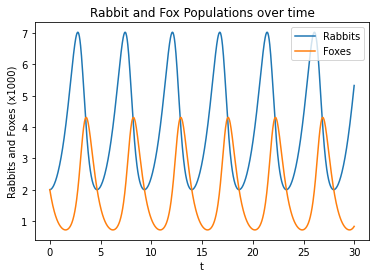

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function to return dx/dt given alpha, beta, x, and y
def fx(alpha, beta, x, y):
  return (alpha*x)-(beta*x*y)

# Function to return dy/dt given gamma, delta, x, and y
def fy(gamma, delta, x, y):
  return (gamma*x*y)-(delta*y)

# Function that fills an x and y array given alpha, beta, gamma, dalta, h, and tArr
def FillArrays(alpha, beta, gamma, delta, h, tArr):
  x = 2                   # initial rabbit population
  y = 2                   # initial fox population

  xArr = []               # arrays to fill
  yArr = []

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill arrays
    xArr.append(x)
    yArr.append(y)
    kx1 = h*fx(alpha, beta, x, y)
    ky1 = h*fy(gamma, delta, x, y)
    kx2 = h*fx(alpha, beta, x+0.5*kx1, y+0.5*ky1)
    ky2 = h*fy(gamma, delta, x+0.5*kx1, y+0.5*ky1)
    kx3 = h*fx(alpha, beta, x+0.5*kx2, y+0.5*ky2)
    ky3 = h*fy(gamma, delta, x+0.5*kx2, y+0.5*ky2)
    kx4 = h*fx(alpha, beta, x+kx3, y+ky3)
    ky4 = h*fy(gamma, delta, x+kx3, y+ky3)
    
    x += (kx1+2*kx2+2*kx3+kx4)/6
    y += (ky1+2*ky2+2*ky3+ky4)/6

  return xArr, yArr

a = 0                     # t=0 start
b = 30                    # max t
N = 1000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

alpha = 1
beta = .5
gamma = .5
delta = 2

# Fill Arrays
xArr, yArr = FillArrays(alpha, beta, gamma, delta, h, tArr)

# Plot Results
plt.plot(tArr,xArr,label="Rabbits")
plt.plot(tArr,yArr,label="Foxes")
plt.title("Rabbit and Fox Populations over time")
plt.xlabel("t")
plt.ylabel("Rabbits and Foxes (x1000)")
plt.legend()
plt.show()

b: Explanation

The rabbit population grows over time but the fox population grows based on the population of rabbits, which then eat the rabbits. Based off this behavior we see that the fox population grows when the rabbit population is high then shrinks when it is low, while the rabbit population grows when the fox population is low and shrinks when the fox population is high. This creates two sine looking waves where the fox population has an offset to the rabbit population.




3) Problem 8.6 Page 351

a: Convert second order EQ to two first order EQs, then make a program solving them.

b: Same program, different amplitude

![picture](https://drive.google.com/uc?export=view&id=1cWwfsGybLJk_Lz-Zrtym1zQ135fgUcDb)




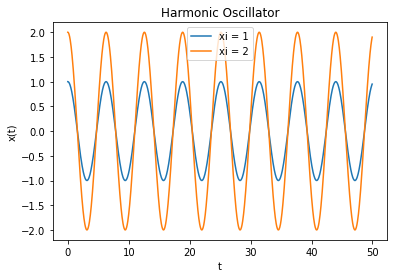

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function to return dv/dt given w and x
def fv(w, x):
  return -(w**2)*x

# Function to return dx/dt given v
def fx(v):
  return v

# Function that fills the x and v arrays given w, h, x, v and tArr
def FillArrays(w, h, x, v, tArr):
  

  xArr = []               # arrays to fill
  vArr = []

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill arrays
    xArr.append(x)
    vArr.append(v)
    kx1 = h*fx(v)
    kv1 = h*fv(w, x)
    kx2 = h*fx(v+0.5*kv1)
    kv2 = h*fv(w, x+0.5*kx1)
    kx3 = h*fx(v+0.5*kv2)
    kv3 = h*fv(w, x+0.5*kx2)
    kx4 = h*fx(v+kv3)
    kv4 = h*fv(w, x+kx3)
    
    x += (kx1+2*kx2+2*kx3+kx4)/6
    v += (kv1+2*kv2+2*kv3+kv4)/6

  return xArr, vArr

a = 0                     # t=0 start
b = 50                    # max t
N = 1000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

w = 1
x = 1                   # initial position
v = 0                   # initial velocity

# Part b

# Fill Arrays
xArr1, vArr1 = FillArrays(w, h, x, v, tArr)

w = 1
x = 2                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr2, vArr2 = FillArrays(w, h, x, v, tArr)

# Plot Results
plt.plot(tArr,xArr1, label = "xi = 1")
plt.plot(tArr,xArr2, label = "xi = 2")
plt.title("Harmonic Oscillator")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()

c: Modify the program for the anharmonic oscillator

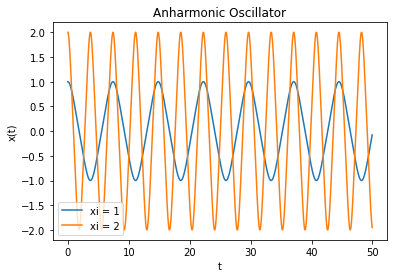

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function to return dv/dt given w and x
def fv(w, x):
  return -(w**2)*(x**3)

# Function to return dx/dt given v
def fx(v):
  return v

# Function that fills the x and v arrays given w, h, x, v and tArr
def FillArrays(w, h, x, v, tArr):
  

  xArr = []               # arrays to fill
  vArr = []

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill arrays
    xArr.append(x)
    vArr.append(v)
    kx1 = h*fx(v)
    kv1 = h*fv(w, x)
    kx2 = h*fx(v+0.5*kv1)
    kv2 = h*fv(w, x+0.5*kx1)
    kx3 = h*fx(v+0.5*kv2)
    kv3 = h*fv(w, x+0.5*kx2)
    kx4 = h*fx(v+kv3)
    kv4 = h*fv(w, x+kx3)
    
    x += (kx1+2*kx2+2*kx3+kx4)/6
    v += (kv1+2*kv2+2*kv3+kv4)/6

  return xArr, vArr

a = 0                     # t=0 start
b = 50                    # max t
N = 1000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

w = 1
x = 1                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr1, vArr1 = FillArrays(w, h, x, v, tArr)

w = 1
x = 2                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr2, vArr2 = FillArrays(w, h, x, v, tArr)

# Plot Results
plt.plot(tArr,xArr1, label = "xi = 1")
plt.plot(tArr,xArr2, label = "xi = 2")
plt.title("Anharmonic Oscillator")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()

d: Modify the program to show velocity against position

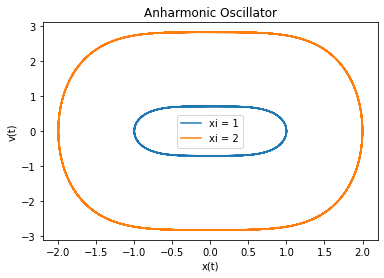

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function to return dv/dt given w and x
def fv(w, x):
  return -(w**2)*(x**3)

# Function to return dx/dt given v
def fx(v):
  return v

# Function that fills the x and v arrays given w, h, x, v and tArr
def FillArrays(w, h, x, v, tArr):
  

  xArr = []               # arrays to fill
  vArr = []

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill arrays
    xArr.append(x)
    vArr.append(v)
    kx1 = h*fx(v)
    kv1 = h*fv(w, x)
    kx2 = h*fx(v+0.5*kv1)
    kv2 = h*fv(w, x+0.5*kx1)
    kx3 = h*fx(v+0.5*kv2)
    kv3 = h*fv(w, x+0.5*kx2)
    kx4 = h*fx(v+kv3)
    kv4 = h*fv(w, x+kx3)
    
    x += (kx1+2*kx2+2*kx3+kx4)/6
    v += (kv1+2*kv2+2*kv3+kv4)/6

  return xArr, vArr

a = 0                     # t=0 start
b = 50                    # max t
N = 1000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

w = 1
x = 1                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr1, vArr1 = FillArrays(w, h, x, v, tArr)

w = 1
x = 2                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr2, vArr2 = FillArrays(w, h, x, v, tArr)

# Plot Results
plt.plot(xArr1, vArr1, label = "xi = 1")
plt.plot(xArr2, vArr2, label = "xi = 2")
plt.title("Anharmonic Oscillator")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.legend()
plt.show()

e: Modify the program for the van der Pol oscillator

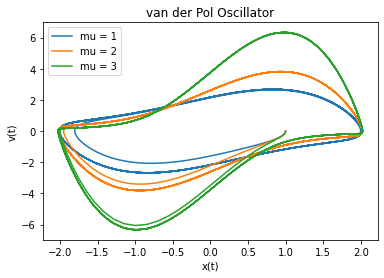

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Function to return dv/dt given w, mu, x, and v
def fv(w, mu, x, v):
  return (mu*(1-(x**2))*v) - ((w**2)*x)

# Function to return dx/dt given v
def fx(v):
  return v

# Function that fills the x and v arrays given w, h, x, v and tArr
def FillArrays(w, mu, h, x, v, tArr):
  

  xArr = []               # arrays to fill
  vArr = []

  for t in tArr:          # Use the 4th order Runge Kutta Method to fill arrays
    xArr.append(x)
    vArr.append(v)
    kx1 = h*fx(v)
    kv1 = h*fv(w, mu, x, v)
    kx2 = h*fx(v+0.5*kv1)
    kv2 = h*fv(w, mu, x+0.5*kx1, v+0.5*kv1)
    kx3 = h*fx(v+0.5*kv2)
    kv3 = h*fv(w, mu, x+0.5*kx2, v+0.5*kv2)
    kx4 = h*fx(v+kv3)
    kv4 = h*fv(w, mu, x+kx3, v+kv3)
    
    x += (kx1+2*kx2+2*kx3+kx4)/6
    v += (kv1+2*kv2+2*kv3+kv4)/6

  return xArr, vArr

a = 0                     # t=0 start
b = 50                    # max t
N = 2000                  # number of steps
h = (b-a)/N               # size of single step
tArr = np.arange(a,b,h)   # Set up array of time values

w = 1
mu = 1
x = 1                   # initial position
v = 0                   # initial velocity

# Fill Arrays
xArr1, vArr1 = FillArrays(w, mu, h, x, v, tArr)


mu = 2

# Fill Arrays
xArr2, vArr2 = FillArrays(w, mu, h, x, v, tArr)

mu = 4

# Fill Arrays
xArr3, vArr3 = FillArrays(w, mu, h, x, v, tArr)

# Plot Results
plt.plot(xArr1, vArr1, label = "mu = 1")
plt.plot(xArr2, vArr2, label = "mu = 2")
plt.plot(xArr3, vArr3, label = "mu = 3")
plt.title("van der Pol Oscillator")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.legend()
plt.show()

4) Problem 8.12 Page 374

a: Program to get the orbit of Earth

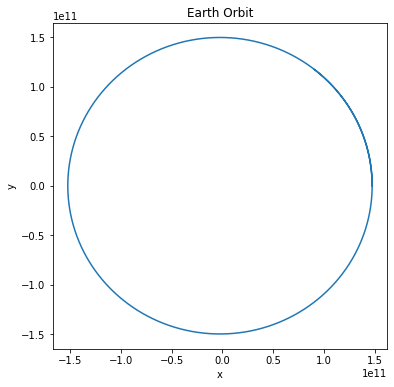

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

G = 6.6738E-11
M = 1.9891E30

# Function to return d^2r/dt^2 given r (vector containing x,y)
def f(r):
  x = r[0]
  y = r[1]

  rcubed = (x*x+y*y)**1.5

  fu = -G*M*x/rcubed
  fv = -G*M*y/rcubed

  return np.array([fu,fv],float)

# Function that fills the x and y arrays given h, r, u, v, and tArr
def FillArrays(h, r, u, v, tArr):
  
  xArr = []               # arrays to fill
  yArr = []

  u_HStep = u + ((1/2)*h*f(r)[0])
  v_HStep = v + ((1/2)*h*f(r)[1])
  for t in tArr:          # Use the Verlet Method to fill arrays
    xArr.append(r[0])
    yArr.append(r[1])

    x_Step = r[0] + (h*u_HStep)
    y_Step = r[1] + (h*v_HStep)

    r[0] = x_Step
    r[1] = y_Step

    kx = h*f(r)[0]
    ky = h*f(r)[1]
    u_Step = u_HStep + (.5*kx)
    v_Step = v_HStep + (.5*ky)
    u_HStep = u_HStep + kx
    v_HStep = v_HStep + ky
    
  return xArr, yArr

a = 0                       # t=0 start
N = 10000                   # number of steps
h = 3600                    # size of single step in seconds (3600 s = 1 hour)
tArr = np.arange(a,N*h,h)   # Set up array of time values


x0 = 1.4710E11              # Starting values
y0 = 0
u0 = 0
v0 = 3.0287E4
r = np.array([x0,y0],float)

# Fill Arrays
xArr, yArr = FillArrays(h, r, u0, v0, tArr)

# Plot Results
plt.figure(figsize=(6,6))
plt.plot(xArr,yArr)
plt.title("Earth Orbit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

b: Modify the program to get potential and kinetic energy

c: Plot the total energy alone

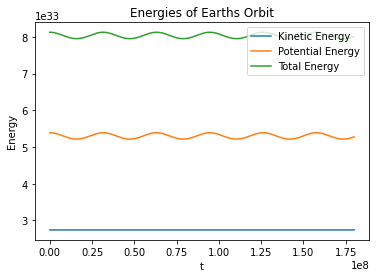

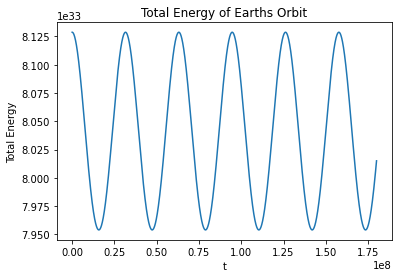

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

G = 6.6738E-11
M = 1.9891E30
m = 5.9722E24

# Function to return d^2r/dt^2 given r (vector containing x,y)
def f(r):
  x = r[0]
  y = r[1]

  rcubed = (x*x+y*y)**1.5

  fu = -G*M*x/rcubed
  fv = -G*M*y/rcubed

  return np.array([fu,fv],float)

# Function that fills the x and y arrays given h, r, and tArr
def FillArrays(h, r, u, v, tArr):
  
  xArr = []               # arrays to fill
  yArr = []
  kArr = []
  UArr = []
  TEArr = []

  u_HStep = u + ((1/2)*h*f(r)[0])
  v_HStep = v + ((1/2)*h*f(r)[1])
  for t in tArr:          # Use the Verlet Method to fill arrays
    k = (1/2)*m*(u**2) + (1/2)*m*(v**2)
    R = np.sqrt( (r[0]**2) + (r[1]**2) )
    U = G*M*m/R
    E = U + k

    xArr.append(r[0])
    yArr.append(r[1])
    kArr.append(k)
    UArr.append(U)
    TEArr.append(E)

    x_Step = r[0] + (h*u_HStep)
    y_Step = r[1] + (h*v_HStep)

    r[0] = x_Step
    r[1] = y_Step

    kx = h*f(r)[0]
    ky = h*f(r)[1]
    u_Step = u_HStep + (.5*kx)
    v_Step = v_HStep + (.5*ky)
    u_HStep = u_HStep + kx
    v_HStep = v_HStep + ky
    
  return xArr, yArr, kArr, UArr, TEArr

a = 0                       # t=0 start
N = 50000                   # number of steps
h = 3600                    # size of single step in seconds (3600 s = 1 hour)
tArr = np.arange(a,N*h,h)   # Set up array of time values


x0 = 1.4710E11              # Starting values
y0 = 0
u0 = 0
v0 = 3.0287E4
r = np.array([x0,y0],float)

# Fill Arrays
xArr, yArr, kArr, UArr, TEArr = FillArrays(h, r, u0, v0, tArr)

# Plot Results
plt.plot(tArr,kArr, label = "Kinetic Energy")
plt.plot(tArr,UArr, label = "Potential Energy")
plt.plot(tArr,TEArr, label = "Total Energy")
plt.title("Energies of Earths Orbit")
plt.xlabel("t")
plt.ylabel("Energy")
plt.legend()
plt.show()

# Part C
plt.plot(tArr,TEArr, label = "Total Energy")
plt.title("Total Energy of Earths Orbit")
plt.xlabel("t")
plt.ylabel("Total Energy")
plt.show()